# Module 1 Lab

## Using the Students dataset from the book website

In [8]:
# Import necessary libraries - common libraries include pandas, numpy, matplotlib, and sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math
import scipy.stats
from sklearn.linear_model import LinearRegression

In [11]:
# Read in the Students data file
# students = pd.read_csv('Students.dat', sep='\s+')
students = pd.read_csv('https://stat4ds.rwth-aachen.de/data/Students.dat', sep='\\s+')
# View the first few rows of the dataset
students.head()
#students.tail()

,subject,gender,age,hsgpa,cogpa,dhome,dres,tv,sport,news,aids,veg,affil,ideol,relig,abor,affirm,life
0,1,0,32,2.2,3.5,0,5.0,3.0,5,0,0,0,2,6,2,0,0,1
1,2,1,23,2.1,3.5,1200,0.3,15.0,7,5,6,1,1,2,1,1,1,3
2,3,1,27,3.3,3.0,1300,1.5,0.0,4,3,0,1,1,2,2,1,1,3
3,4,1,35,3.5,3.2,1500,8.0,5.0,5,6,3,0,3,4,1,1,1,2
4,5,0,23,3.1,3.5,1600,10.0,6.0,6,3,0,0,3,1,0,1,0,2


In [12]:
# Calculate summary statistics
students.describe()

,subject,gender,age,hsgpa,cogpa,dhome,dres,tv,sport,news,aids,veg,affil,ideol,relig,abor,affirm,life
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,0.516667,29.166667,3.308333,3.453333,1232.200000,3.818333,7.266667,5.483333,4.083333,1.433333,0.150000,2.050000,3.033333,1.166667,0.783333,0.716667,1.750000
std,17.464249,0.503939,8.475621,0.459658,0.351494,1681.747949,4.117902,6.717336,3.872947,3.004469,2.431200,0.360085,0.871877,1.636104,0.977140,0.415450,0.454420,0.856184
min,1.000000,0.000000,22.000000,2.000000,2.600000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,15.750000,0.000000,24.000000,3.000000,3.175000,205.000000,1.450000,3.000000,3.000000,2.000000,0.000000,0.000000,1.000000,2.000000,0.750000,1.000000,0.000000,1.000000
50%,30.500000,1.000000,26.500000,3.350000,3.500000,640.000000,2.000000,6.000000,5.000000,3.000000,0.500000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,45.250000,1.000000,31.000000,3.625000,3.725000,1350.000000,5.000000,10.000000,7.000000,5.250000,2.000000,0.000000,3.000000,4.000000,2.000000,1.000000,1.000000,3.000000
max,60.000000,1.000000,71.000000,4.000000,4.000000,8000.000000,20.000000,37.000000,16.000000,14.000000,11.000000,1.000000,3.000000,7.000000,3.000000,1.000000,1.000000,3.000000


In [13]:
# Plotting function for discrete variables
def discrete_plots(df, columns, num_cols):
    n_plots = len(columns)
    n_cols = num_cols
    n_rows = int(math.ceil(n_plots/n_cols))
    gs = gridspec.GridSpec(n_rows, n_cols)
    fig = plt.figure(figsize=(12,8))
    for i in range(n_plots):
        ax = fig.add_subplot(gs[i])
        df[columns[i]].value_counts().sort_index().plot(kind='bar', ax=ax)
        ax.set_xlabel(columns[i])
    fig.tight_layout()
    fig.supylabel('Count')
    plt.show()


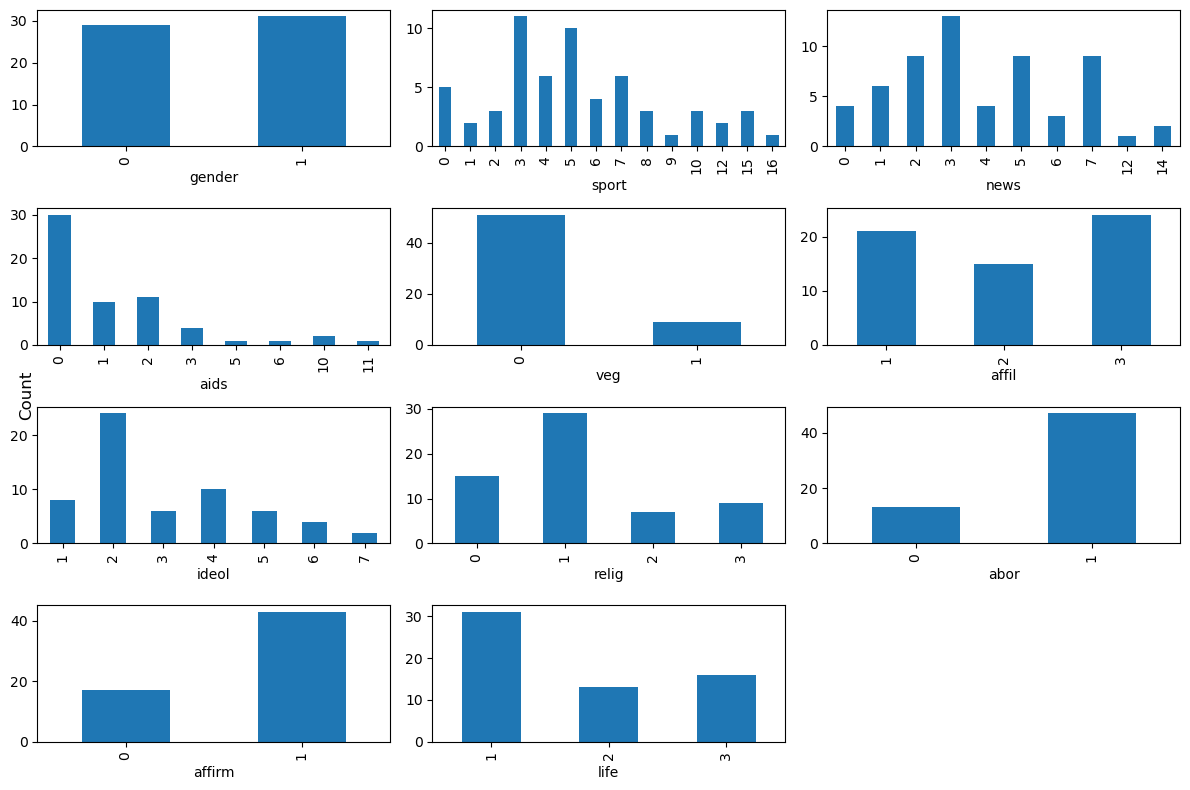

In [14]:
# Plot discrete variables
discrete_plots(students, ['gender', 'sport', 'news', 'aids', 'veg', 'affil', 'ideol', 'relig', 'abor', 'affirm', 'life'], 3)

In [15]:
# Plotting function for continuous variables
def continuous_plots(df, columns, num_cols):
    n_plots = len(columns)
    n_cols = num_cols
    n_rows = int(math.ceil(n_plots/n_cols))
    gs = gridspec.GridSpec(n_rows, n_cols)
    fig = plt.figure(figsize=(12,8))
    for i in range(n_plots):
        ax = fig.add_subplot(gs[i])
        df[columns[i]].hist(ax=ax, grid=False)
        ax.set_xlabel(columns[i])
    fig.tight_layout()
    fig.supylabel('Count')
    plt.show()

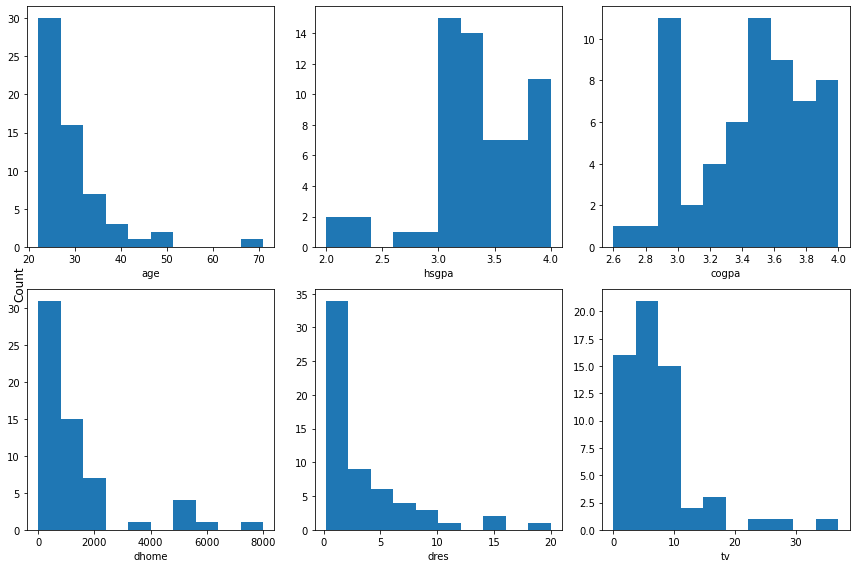

In [8]:
# Plot continuous variables
continuous_plots(students, ['age', 'hsgpa', 'cogpa', 'dhome', 'dres', 'tv'], 3)

## 1.21

### For the Students data file introduced in Exercise 1.2, summarize the relationship between hsgpa and cogpa using correlation and regression. Find the predicted college GPA of a student who had a high school GPA of 4.0.

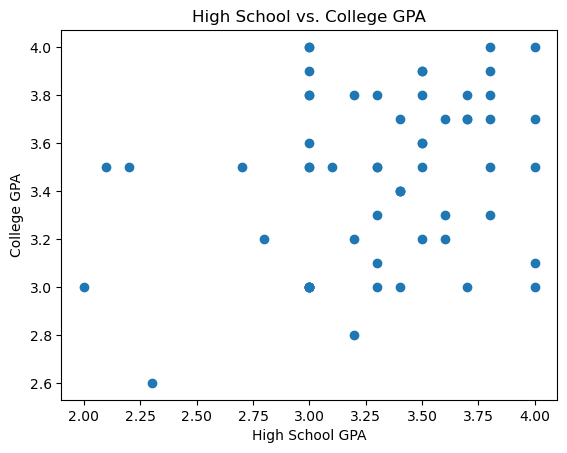

High School GPA: Mean=3.308, Std Dev=0.456
College GPA: Mean=3.453, Std Dev=0.349


In [16]:
# First, create a scatter plot of the two variables
hs_gpa = students['hsgpa']
co_gpa = students['cogpa']
plt.scatter(hs_gpa, co_gpa)
plt.xlabel('High School GPA')
plt.ylabel('College GPA')
plt.title('High School vs. College GPA')
plt.show()
# Print mean and standard deviation
print('High School GPA: Mean=%.3f, Std Dev=%.3f' % (np.mean(hs_gpa), np.std(hs_gpa)))
print('College GPA: Mean=%.3f, Std Dev=%.3f' % (np.mean(co_gpa), np.std(co_gpa)))

In [17]:
# Calculate the correlation between the two variables
corr = scipy.stats.pearsonr(hs_gpa, co_gpa)
print('Correlation between High School GPA and College GPA: %.3f' % corr[0])

Correlation between High School GPA and College GPA: 0.278


In [18]:
# Reshape data for regression
hs_gpa_lm = hs_gpa.values.reshape(-1,1)

# Simple linear regression
lm = LinearRegression()
lm.fit(hs_gpa_lm, co_gpa)
# Print the slope and intercept to get the equation 
print('Intercept: %.3f' % lm.intercept_)
print('Slope: %.3f' % lm.coef_)

Intercept: 2.749
Slope: 0.213


C:\Users\Jagdi\AppData\Local\Temp\ipykernel_24644\271618373.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Slope: %.3f' % lm.coef_)


The equation for a simple linear regression is:

$$y = \alpha + \beta{x}$$

Therefore the equation for this model is:

$$College GPA = 2.75 + 0.213{High School GPA}$$

In [13]:
# Find predicted college GPA if high school GPA is 4.0
pred_co_gpa = 2.749 + (0.213*4.0)
print('The predicted college GPA is: %.1f' % pred_co_gpa)

The predicted college GPA is: 3.6
